## <b>EDA</b>
Preprocessing of the data

In [1]:
# Import all necessary modules
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors

import sklearn
import sklearn.decomposition
from sklearn.preprocessing import MinMaxScaler

<ul>
<li>Make dataframe from csv sheet</li>
<li>Check for missing data</li>
<li>Check for duplicates</li>

</ul>

In [2]:
# Set filename that contains molecules with data about them
filename = 'Data/tested_molecules_descriptors.csv'

df_molecules = pd.read_csv(filename) # Create df 
df_molecules.head(1) 


,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,C=C(C)c1nc(N)nc(N)n1,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,142.101,151.085795,...,5,2,5,1,0,0,0,1,0.0691,43.3598


In [7]:
#set filename that contains tested molecules 
filename = 'Data/tested_molecules.csv'

df_tested = pd.read_csv(filename) 
df_tested.head(1) 

,SMILES,PKM2_inhibition,ERK2_inhibition
0,C=C(C)c1nc(N)nc(N)n1,0,0


In [3]:
missing_data = df_molecules.isnull().sum().sum() # Check for missing data
print("The amount of missing data is", missing_data)

The amount of missing data is 0


In [4]:
num_duplicated_rows = df_molecules.duplicated().sum() # Check for duplicates
print("The amount of duplicated rows is", num_duplicated_rows)

The amount of duplicated rows is 0


<b>PCA</b>
<ul>
<li>Data scaling</li>
<li>PCA</li>
</ul>

In [5]:
MMscalar = MinMaxScaler() # Make scaler for min max scaling
features = df_molecules.columns[1:124] # Delete the inhibitor columns 
# Scale the data
y = df_molecules.loc[:, features].values 
MMscalar.fit(y)
scaleMM_data = MMscalar.transform(y)
# Make df out of scaled data
df_scaled = pd.DataFrame(scaleMM_data)
df_scaled.head(1)

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.173157,0.173157,0.109446,0.876574,0.496613,0.007585,0.0,0.0,0.0,0.034091,...,0.25,0.166667,0.454545,0.5,0.25,0.083333,0.0,0.0,0.0,0.142857


Text(0, 0.5, 'PC2')

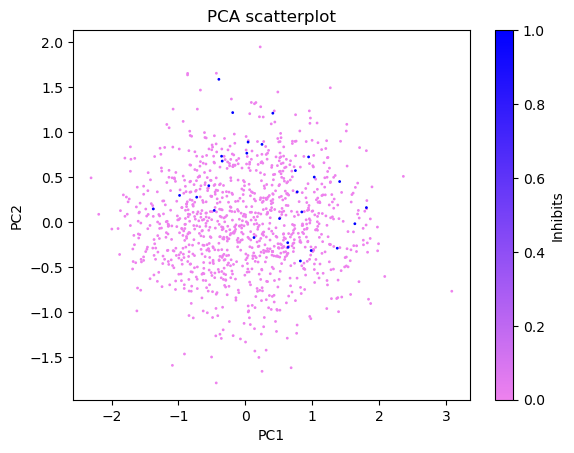

In [10]:
# Perform pca on data with 2 components
pca=sklearn.decomposition.PCA(n_components=2)
principalcomp = pca.fit_transform(df_scaled)
df_principalcomp=pd.DataFrame(data=principalcomp,columns=['PC1','PC2'])

# Make colours for the scatterplot 
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["violet","blue"])

# Make scatterplot for PC1 and PC2 with the inhibitor as colour 
fig_score,ax_score= plt.subplots()
scatter=ax_score.scatter(df_principalcomp['PC1'],df_principalcomp['PC2'],c=df_tested['PKM2_inhibition'], cmap=cmap, s=1)

# Add scorebar, title and labels
plt.colorbar(scatter, ax=ax_score, label='Inhibits')
ax_score.set_title('PCA scatterplot')
ax_score.set_xlabel('PC1')
ax_score.set_ylabel('PC2')



Text(0, 0.5, 'PC2')

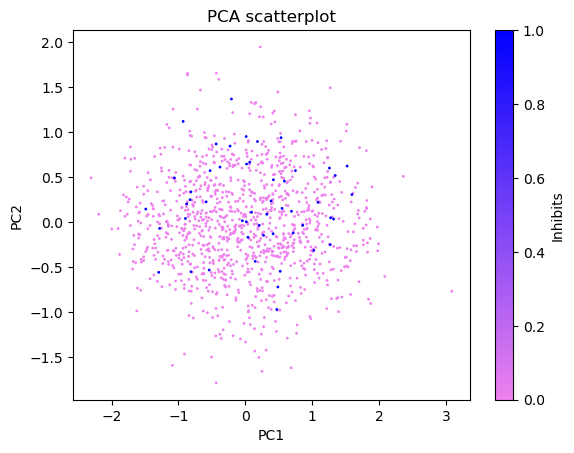

In [12]:
# Make scatterplot for PC1 and PC2 with the inhibitor as colour 
fig_score,ax_score= plt.subplots()
scatter=ax_score.scatter(df_principalcomp['PC1'],df_principalcomp['PC2'],c=df_tested['ERK2_inhibition'], cmap=cmap, s=1)

# Add scorebar, title and labels
plt.colorbar(scatter, ax=ax_score, label='Inhibits')
ax_score.set_title('PCA scatterplot')
ax_score.set_xlabel('PC1')
ax_score.set_ylabel('PC2')